 Import Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 Load the Dataset

In [ ]:
dataframe = pd.read_csv("C:/Users/jeeva/Downloads/Zomato-data-.csv")  # Update with the correct file path
print(dataframe.head())  # Display the first five rows

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Data Cleaning and Preprocessing

In [16]:
def handleRate(value):
    value = str(value).split('/')  # Split at '/'
    return float(value[0])  # Take only the first part as float

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())  # Check the cleaned column


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Check Data Types and Missing Values

In [17]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [19]:
dataframe = dataframe.dropna()  # Remove missing values


Exploratory Data Analysis (EDA)

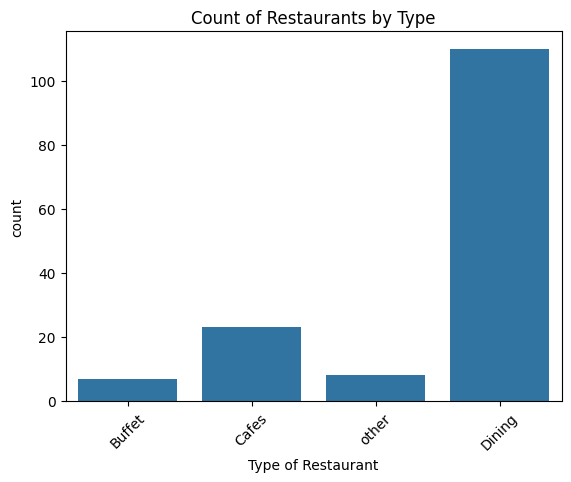

In [20]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")
plt.xticks(rotation=45)
plt.title("Count of Restaurants by Type")
plt.show()


Votes by Restaurant Type

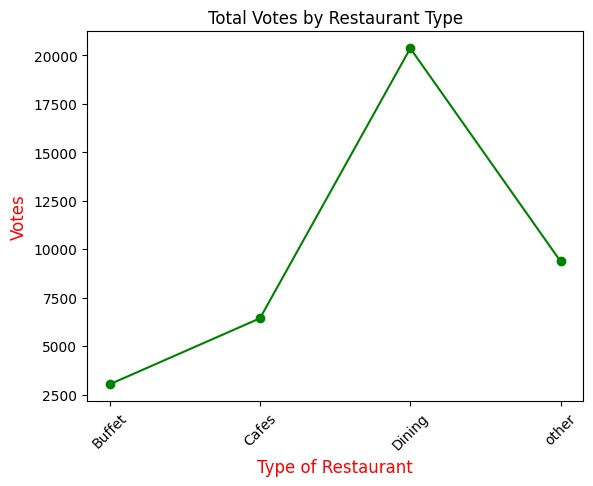

In [21]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

plt.plot(result, c='green', marker='o')
plt.xlabel('Type of Restaurant', c='red', size=12)
plt.ylabel('Votes', c='red', size=12)
plt.xticks(rotation=45)
plt.title("Total Votes by Restaurant Type")
plt.show()


Identify the Restaurant with Maximum Votes

In [22]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Online Order Preference

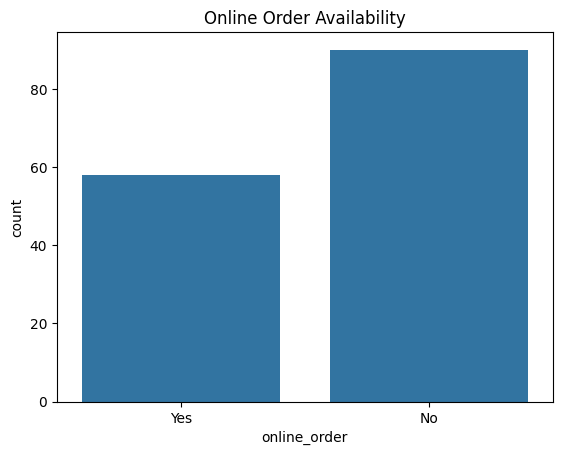

In [23]:
sns.countplot(x=dataframe['online_order'])
plt.title("Online Order Availability")
plt.show()


 Ratings Distribution

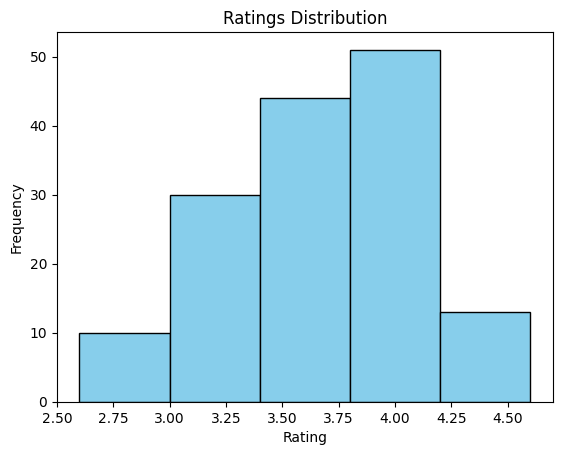

In [24]:
plt.hist(dataframe['rate'], bins=5, color='skyblue', edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


 Approximate Cost for Two People

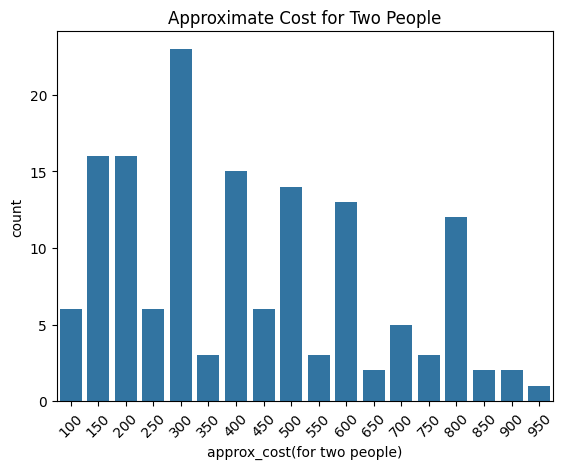

In [25]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xticks(rotation=45)
plt.title("Approximate Cost for Two People")
plt.show()


Online Order vs. Ratings (Box Plot)

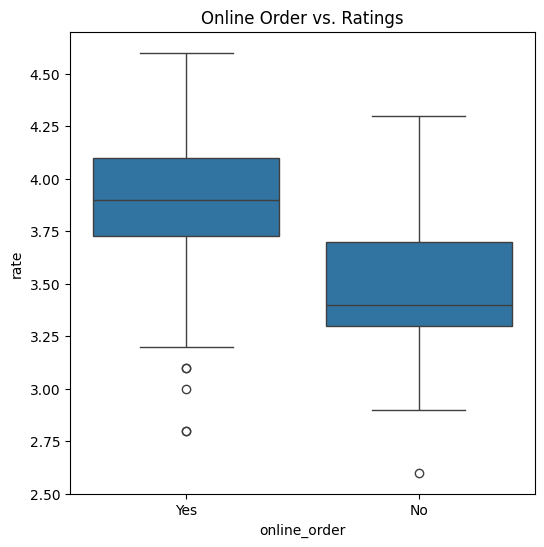

In [26]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.title("Online Order vs. Ratings")
plt.show()


Heatmap: Online Order vs. Restaurant Type

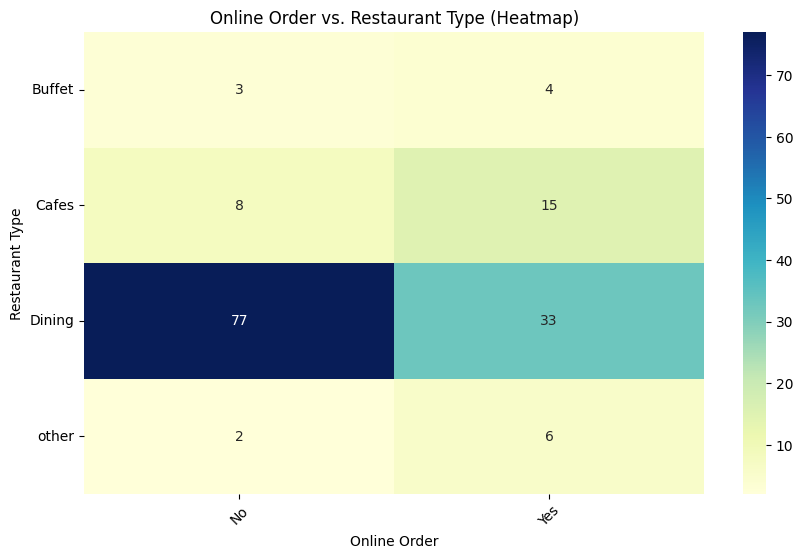

In [27]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Online Order vs. Restaurant Type (Heatmap)')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
